In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/archive (1).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/leapGestRecog')

print("✅ Dataset extracted")


✅ Dataset extracted


In [5]:
!ls /content/leapGestRecog/leapgestrecog


leapGestRecog


In [4]:
!find /content/leapGestRecog -type d | head -20



/content/leapGestRecog
/content/leapGestRecog/leapgestrecog
/content/leapGestRecog/leapgestrecog/leapGestRecog
/content/leapGestRecog/leapgestrecog/leapGestRecog/09
/content/leapGestRecog/leapgestrecog/leapGestRecog/09/08_palm_moved
/content/leapGestRecog/leapgestrecog/leapGestRecog/09/09_c
/content/leapGestRecog/leapgestrecog/leapGestRecog/09/10_down
/content/leapGestRecog/leapgestrecog/leapGestRecog/09/01_palm
/content/leapGestRecog/leapgestrecog/leapGestRecog/09/06_index
/content/leapGestRecog/leapgestrecog/leapGestRecog/09/02_l
/content/leapGestRecog/leapgestrecog/leapGestRecog/09/04_fist_moved
/content/leapGestRecog/leapgestrecog/leapGestRecog/09/05_thumb
/content/leapGestRecog/leapgestrecog/leapGestRecog/09/07_ok
/content/leapGestRecog/leapgestrecog/leapGestRecog/09/03_fist
/content/leapGestRecog/leapgestrecog/leapGestRecog/00
/content/leapGestRecog/leapgestrecog/leapGestRecog/00/08_palm_moved
/content/leapGestRecog/leapgestrecog/leapGestRecog/00/09_c
/content/leapGestRecog/leapg

In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = []
labels = []

base_path = '/content/leapGestRecog/leapgestrecog/leapGestRecog'
user_folders = sorted(os.listdir(base_path))

for user in user_folders:
    user_path = os.path.join(base_path, user)
    gesture_folders = sorted(os.listdir(user_path))

    for gesture in gesture_folders:
        gesture_path = os.path.join(user_path, gesture)
        image_names = os.listdir(gesture_path)

        for img_name in image_names:
            img_path = os.path.join(gesture_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                img = cv2.resize(img, (64, 64))
                data.append(img)
                labels.append(int(gesture.split('_')[0]))

data = np.array(data).reshape(-1, 64, 64, 1) / 255.0
labels = to_categorical(np.array(labels))

print("✅ Loaded")
print("Images:", data.shape)
print("Labels:", labels.shape)


✅ Loaded
Images: (20000, 64, 64, 1)
Labels: (20000, 11)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(labels.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,995 (6.20 MB)

 Trainable params: 1,625,995 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 411ms/step - accuracy: 0.6562 - loss: 1.0274 - val_accuracy: 0.9975 - val_loss: 0.0200
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 132s 366ms/step - accuracy: 0.9889 - loss: 0.0421 - val_accuracy: 0.9981 - val_loss: 0.0083
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 141s 361ms/step - accuracy: 0.9959 - loss: 0.0178 - val_accuracy: 0.9994 - val_loss: 0.0016
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 355ms/step - accuracy: 0.9963 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 86s 372ms/step - accuracy: 0.9959 - loss: 0.0140 - val_accuracy: 0.9994 - val_loss: 0.0015
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 86s 382ms/step - accuracy: 0.9972 - loss: 0.0085 - val_accuracy: 0.9994 - val_loss: 0.0015
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 139s 370ms/step - accuracy: 0.9971 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 3.6464e-04
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 142s 369ms/step - accuracy: 0.9985 -

In [11]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.9994 - loss: 0.0022
Test Accuracy: 99.92%


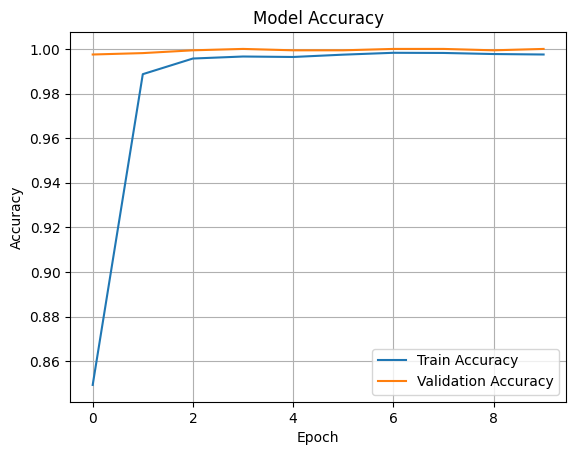

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
